In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **資料預處理**

In [ ]:
from zipfile import ZipFile
path = "/content/drive/MyDrive/ttgroup/0_9000/0519_crop_hd_save_pics.zip"
f = ZipFile(path)
# f.extractall() 小括號是直接解壓縮在同一層
f.extractall()

In [ ]:
from zipfile import ZipFile
path = "/content/drive/MyDrive/ttgroup/0_9000/0519_crop_sho_save_pics.zip"
f = ZipFile(path)
# f.extractall() 小括號是直接解壓縮在同一層
f.extractall()

In [ ]:
from zipfile import ZipFile
path = "/content/drive/MyDrive/ttgroup/0_9000/0519_crop_ft_save_pics.zip"
f = ZipFile(path)
# f.extractall() 小括號是直接解壓縮在同一層
f.extractall()

In [ ]:
# 製作igm_name的list
import glob
import pandas as pd
import numpy as np

# sorted() : 排序所有可跌代對象
# split() : 分割()
fn_dic = {"img_name":[]}
paths = sorted(glob.glob("0519_crop_hd_save_pics/*"))
for path in paths:
  fn = path.split("/")[-1].split(".")[0]
  fn_dic["img_name"].append(fn)
fn_dic_df = pd.DataFrame(fn_dic)
fn_dic_df

In [ ]:
# img_combine_hd_arr 訓練資料DataFarme (x_train, x_test)
from PIL import Image
fn_list = fn_dic["img_name"]

# create img_combine_hd_arr
img_hd_arr_list = []
for fn in fn_list:
  img = Image.open("/content/0519_crop_hd_save_pics/" + fn + ".jpg").convert("RGB")
  img = img.resize((256, 256))
  globals()["img_"+ fn] = img
  globals()["img_"+ fn + "_arr"] = np.array(globals()["img_"+fn])
  img_hd_arr_list.append(globals()["img_"+ fn + "_arr"])
  img.close()
# img_arr_list = ()
img_combine_hd_arr = np.array(img_hd_arr_list)
# img_combine_hd_arr.shape

# img_combine_sho_arr 訓練資料DataFarme (x_train, x_test)
img_sho_arr_list = []
for fn in fn_list:
  img = Image.open("/content/0519_crop_sho_save_pics/" + fn + ".jpg").convert("RGB")
  img = img.resize((256, 256))
  globals()["img_"+ fn] = img
  globals()["img_"+ fn + "_arr"] = np.array(globals()["img_"+fn])
  img_sho_arr_list.append(globals()["img_"+ fn + "_arr"])
  img.close()
# img_arr_list = ()
img_combine_sho_arr = np.array(img_sho_arr_list)
# img_combine_sho_arr.shape

# img_combine_ft_arr 訓練資料DataFarme (x_train, x_test)
img_ft_arr_list = []
for fn in fn_list:
  img = Image.open("/content/0519_crop_ft_save_pics/" + fn + ".jpg").convert("RGB")
  img = img.resize((256, 256))
  globals()["img_"+ fn] = img
  globals()["img_"+ fn + "_arr"] = np.array(globals()["img_"+fn])
  img_ft_arr_list.append(globals()["img_"+ fn + "_arr"])
  img.close()
# img_arr_list = ()
img_combine_ft_arr = np.array(img_ft_arr_list)
img_combine_ft_arr.shape

In [ ]:
# ans_df  驗證資料DataFrame (y_train, y_test)
base = "/content/drive/MyDrive/ttgroup/0_9000/0519_wrong_total_sit_value_combinefoot_0_9000.csv"
csv = pd.read_csv(base, sep=",")
ans_df = pd.DataFrame(csv)
ans_df = ans_df.drop(["img_name"], axis=1)
ans_arr = np.array(ans_df)

# ans_hd_df
ans_hd_df = pd.DataFrame(ans_df["head"])

# ans_sho_df
ans_sho_df = pd.DataFrame(ans_df["shoulder"])
ans_sho_df

# ans_ft_df
ans_ft_df = pd.DataFrame(ans_df["foot"])
ans_ft_df


# Data_preprocess

In [ ]:
# 切割資料_hd x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
import numpy as np
hd_x_train, hd_x_test, hd_y_train, hd_y_test = train_test_split(img_combine_hd_arr,
                             np.array(ans_hd_df),
                             test_size=0.1)

# 切割資料_sho x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
import numpy as np
sho_x_train, sho_x_test, sho_y_train, sho_y_test = train_test_split(img_combine_sho_arr,
                             np.array(ans_sho_df),
                             test_size=0.1)

# 切割資料_ft x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
import numpy as np
ft_x_train, ft_x_test, ft_y_train, ft_y_test = train_test_split(img_combine_ft_arr,
                             np.array(ans_ft_df),
                             test_size=0.1)

In [ ]:
print(hd_x_train.shape)
print(hd_y_train.shape)
print(hd_x_test.shape)
print(hd_y_test.shape)
print("-" * 15)
print(sho_x_train.shape)
print(sho_y_train.shape)
print(sho_x_test.shape)
print(sho_y_test.shape)
print("-" * 15)
print(ft_x_train.shape)
print(ft_y_train.shape)
print(ft_x_test.shape)
print(ft_y_test.shape)

(526, 256, 256, 3)
(526, 1)
(59, 256, 256, 3)
(59, 1)
---------------
(526, 256, 256, 3)
(526, 1)
(59, 256, 256, 3)
(59, 1)
---------------
(526, 256, 256, 3)
(526, 1)
(59, 256, 256, 3)
(59, 1)


160
[1, 1, 0]


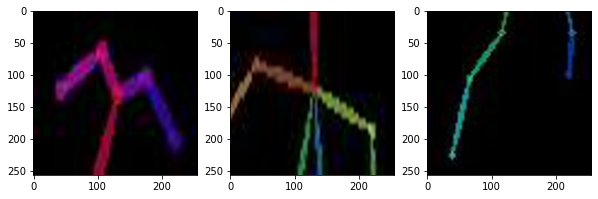

In [ ]:
# 測試圖片和標籤 test_rd_pic_label
import random
import matplotlib.pyplot as plt
idx = random.randint(0, 260)

# 一次plot多個部位方式: 但因為三個部位tran_test_split 資料不一樣,所以plot的圖片也會不同張
print(idx)
label_list = [hd_y_train[idx][0], sho_y_train[idx][0], ft_y_train[idx][0]]
img_show_cb_arr = np.array([hd_x_train[idx], sho_x_train[idx], ft_x_train[idx]])
print(label_list)
# Plot_pics
plt.figure(figsize=(10,10))
for i in range(len(img_show_cb_arr)):
  plt.subplot(1,3,i+1)
  plt.imshow(img_show_cb_arr[i])

# Create Model

In [ ]:
# create hd_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
layers = [
    Conv2D(32, 3, padding="same", activation="relu", input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(1, activation="sigmoid")
]
hd_model = Sequential(layers)
hd_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       2

In [ ]:
# create sho_model

layers = [
    Conv2D(32, 3, padding="same", activation="relu", input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(1, activation="sigmoid")
]
sho_model = Sequential(layers)
sho_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 256)      

In [ ]:
# create ft_model

layers = [
    Conv2D(32, 3, padding="same", activation="relu", input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(1, activation="sigmoid")
]
ft_model = Sequential(layers)
ft_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 256)      

In [ ]:
# create hd_loss
from tensorflow.keras.losses import BinaryCrossentropy
hd_model.compile(loss=BinaryCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

# create sho_loss
sho_model.compile(loss=BinaryCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

# create ft_loss
ft_model.compile(loss=BinaryCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
# hd_norm
hd_x_train_norm = hd_x_train / 255
hd_x_test_norm = hd_x_test / 255

# sho_norm
sho_x_train_norm = sho_x_train / 255
sho_x_test_norm = sho_x_test / 255

# ft_norm
ft_x_train_norm = ft_x_train / 255
ft_x_test_norm = ft_x_test / 255

In [ ]:
# hd_fit
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
   EarlyStopping(patience=5, restore_best_weights=True),
   ModelCheckpoint("crop_hd_cnn.h5", save_best_only=True) 
]

hd_model.fit(hd_x_train_norm,
     hd_y_train,
     batch_size=20,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
24/24 - 1s - loss: 0.2908 - accuracy: 0.8668 - val_loss: 0.2497 - val_accuracy: 0.8868
Epoch 2/50
24/24 - 1s - loss: 0.2752 - accuracy: 0.8795 - val_loss: 0.2471 - val_accuracy: 0.8679
Epoch 3/50
24/24 - 1s - loss: 0.2830 - accuracy: 0.8774 - val_loss: 0.3050 - val_accuracy: 0.8491
Epoch 4/50
24/24 - 1s - loss: 0.3363 - accuracy: 0.8351 - val_loss: 0.2772 - val_accuracy: 0.8113
Epoch 5/50
24/24 - 1s - loss: 0.2802 - accuracy: 0.8584 - val_loss: 0.2488 - val_accuracy: 0.8868
Epoch 6/50
24/24 - 1s - loss: 0.2631 - accuracy: 0.8795 - val_loss: 0.2747 - val_accuracy: 0.8679
Epoch 7/50
24/24 - 1s - loss: 0.2458 - accuracy: 0.8922 - val_loss: 0.2416 - val_accuracy: 0.8491
Epoch 8/50
24/24 - 1s - loss: 0.3159 - accuracy: 0.8562 - val_loss: 0.3109 - val_accuracy: 0.8113
Epoch 9/50
24/24 - 1s - loss: 0.3170 - accuracy: 0.8372 - val_loss: 0.3034 - val_accuracy: 0.8679
Epoch 10/50
24/24 - 1s - loss: 0.2549 - accuracy: 0.9070 - val_loss: 0.3069 - val_accuracy: 0.8302
Epoch 11/50
24/24 -

In [ ]:
hd_model.evaluate(hd_x_test_norm, hd_y_test)

2/2 [==============================] - 2s 884ms/step - loss: 0.3386 - accuracy: 0.7966


[0.3385546803474426, 0.7966101765632629]

In [ ]:
# sho_fit
callbacks = [
   EarlyStopping(patience=5, restore_best_weights=True),
   ModelCheckpoint("crop_sho_cnn.h5", save_best_only=True) 
]

sho_model.fit(sho_x_train_norm,
     sho_y_train,
     batch_size=20,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
24/24 - 2s - loss: 0.6621 - accuracy: 0.7188 - val_loss: 0.6168 - val_accuracy: 0.8113
Epoch 2/50
24/24 - 1s - loss: 0.5871 - accuracy: 0.7442 - val_loss: 0.5218 - val_accuracy: 0.8113
Epoch 3/50
24/24 - 1s - loss: 0.5782 - accuracy: 0.7442 - val_loss: 0.4879 - val_accuracy: 0.8113
Epoch 4/50
24/24 - 1s - loss: 0.5697 - accuracy: 0.7442 - val_loss: 0.4864 - val_accuracy: 0.8113
Epoch 5/50
24/24 - 1s - loss: 0.5611 - accuracy: 0.7442 - val_loss: 0.5267 - val_accuracy: 0.8113
Epoch 6/50
24/24 - 1s - loss: 0.5580 - accuracy: 0.7442 - val_loss: 0.4885 - val_accuracy: 0.8113
Epoch 7/50
24/24 - 1s - loss: 0.5582 - accuracy: 0.7442 - val_loss: 0.4355 - val_accuracy: 0.8113
Epoch 8/50
24/24 - 1s - loss: 0.5147 - accuracy: 0.7442 - val_loss: 0.3661 - val_accuracy: 0.8113
Epoch 9/50
24/24 - 1s - loss: 0.5170 - accuracy: 0.7632 - val_loss: 0.5531 - val_accuracy: 0.8868
Epoch 10/50
24/24 - 1s - loss: 0.4909 - accuracy: 0.7590 - val_loss: 0.3134 - val_accuracy: 0.8491
Epoch 11/50
24/24 -

In [ ]:
# sho_evaluate
sho_model.evaluate(sho_x_test_norm, sho_y_test)

2/2 [==============================] - 0s 22ms/step - loss: 0.2027 - accuracy: 0.8983


[0.20274870097637177, 0.8983050584793091]

In [ ]:
# ft_fit
callbacks = [
   EarlyStopping(patience=5, restore_best_weights=True),
   ModelCheckpoint("crop_ft_cnn.h5", save_best_only=True) 
]

ft_model.fit(ft_x_train_norm,
     ft_y_train,
     batch_size=20,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
24/24 - 1s - loss: 0.3127 - accuracy: 0.8879 - val_loss: 0.3089 - val_accuracy: 0.9245
Epoch 2/50
24/24 - 1s - loss: 0.3125 - accuracy: 0.8774 - val_loss: 0.3024 - val_accuracy: 0.9057
Epoch 3/50
24/24 - 1s - loss: 0.3308 - accuracy: 0.8943 - val_loss: 0.3316 - val_accuracy: 0.9245
Epoch 4/50
24/24 - 1s - loss: 0.3192 - accuracy: 0.8732 - val_loss: 0.3137 - val_accuracy: 0.8868
Epoch 5/50
24/24 - 1s - loss: 0.3682 - accuracy: 0.8626 - val_loss: 0.2924 - val_accuracy: 0.9245
Epoch 6/50
24/24 - 1s - loss: 0.3035 - accuracy: 0.8858 - val_loss: 0.3124 - val_accuracy: 0.9245
Epoch 7/50
24/24 - 1s - loss: 0.3043 - accuracy: 0.8795 - val_loss: 0.2980 - val_accuracy: 0.9245
Epoch 8/50
24/24 - 1s - loss: 0.2969 - accuracy: 0.8837 - val_loss: 0.3377 - val_accuracy: 0.9057
Epoch 9/50
24/24 - 1s - loss: 0.3324 - accuracy: 0.8668 - val_loss: 0.2966 - val_accuracy: 0.9434
Epoch 10/50
24/24 - 1s - loss: 0.2923 - accuracy: 0.8901 - val_loss: 0.3426 - val_accuracy: 0.8868


In [ ]:
ft_model.evaluate(ft_x_test_norm, ft_y_test)

2/2 [==============================] - 0s 21ms/step - loss: 0.3357 - accuracy: 0.8644


[0.33566784858703613, 0.8644067645072937]

In [ ]:
# input_and_Pro_pic
model_n_list = [hd_model, sho_model, ft_model]

# def (fn_path 圖片路徑, 
#    col_n column_name_list_num [0:head, 1:sho, 2:foot], 
#    m_nl model_name_list_num [0:hd_model, 1:sho_model, 2:ft_model]
#    )   
def Pro_result(fn_path, col_n=0, m_n_l=0):
  img = Image.open(fn_path).resize((256, 256)).convert("RGB")
  img_np = np.array(img)
  img_np_r = img_np.reshape(1, 256, 256, 3) / 255.0
  img.close()
  Pro_res_dic = {
            "ans_name":[],
            "Proba":[],
            "T&F":[],
            "W_F":[],
            }
  # 拿column_name, 預設[0] -> "head"
  ans_name = ans_df.columns.tolist()[col_n]
  # print(ans_hd_names)
            
  # Proba_wrong_head
  pre = model_n_list[m_n_l].predict(img_np_r)[0]
  pre_list = pre.tolist()
  # print("預測數值", pre_list)

  # round(Proba) -> 0 or 1
  ans = round(pre_list[0])
  # print("T&F:", ans_hd)

  # class wrong or correct
  def T_F_r(ans):
    T_F_List = ["correct","wrong"]
    return T_F_List[1] if ans == 1 else T_F_List[0]

  # 設定回字典
  Pro_res_dic["ans_name"].append(ans_name)
  Pro_res_dic["Proba"].append(pre_list[0])
  Pro_res_dic["T&F"].append(ans)
  Pro_res_dic["W_F"].append(T_F_r(ans))
  return Pro_res_dic

# use_def_Pro_pics 
hd_Pro_dic = Pro_result("/content/crop_hd_footup3.jpg", col_n=0, m_n_l=0)
sho_Pro_dic = Pro_result("/content/crop_sho_footup3.jpg", col_n=1, m_n_l=1)
ft_Pro_dic = Pro_result("/content/crop_ft_footup3.jpg", col_n=2, m_n_l=2)

print(str(hd_Pro_dic) + "\n" + str(sho_Pro_dic) + "\n" + str(ft_Pro_dic))

FileNotFoundError: ignored

In [ ]:
# final_present
pd.DataFrame([hd_Pro_dic, sho_Pro_dic, ft_Pro_dic])